# Pôle Emploi Agencies

Date: 2017-11-19

Author: Pascal `pascal@bayesimpact.org`

In Pôle emploi Open Data (from [Emploi Store Dev](https://www.emploi-store-dev.fr/)), since at least July 2017, one can find the list of Pôle emploi agencies. This notebook is an overview of this dataset.

You can download the csv file from the dataset by using the following command:

```bash
docker-compose run --rm data-analysis-prepare make data/pole-emploi-agencies.csv
```

## Import and Format

First let's import the CSV and check the format of the various columns:

In [1]:
import os
from os import path

import pandas as pd
import seaborn as _

DATA_FOLDER = os.getenv('DATA_FOLDER')

agencies = pd.read_csv(path.join(DATA_FOLDER, 'pole-emploi-agencies.csv'))
agencies.head()

,ADDRESS_LINE_3,ADDRESS_LINE_4,ADDRESS_LINE_5,ADDRESS_LINE_6,AGENCY_NAME,AGENCY_TYPE_CODE,AGENCY_TYPE_NAME,APPT_CLOSING_HOUR_FRI_SLOT_1,APPT_CLOSING_HOUR_FRI_SLOT_2,APPT_CLOSING_HOUR_MON_SLOT_1,...,OPENING_HOUR_THU_SLOT_2,OPENING_HOUR_TUE_SLOT_1,OPENING_HOUR_TUE_SLOT_2,OPENING_HOUR_WED_SLOT_1,OPENING_HOUR_WED_SLOT_2,POSTCODE,PUBLIC_PHONE_NUMBER,REG_DIRECTION_NAME,SAFIR_AGENCY_CODE,WEEKLY_NUMBER_HOURS
0,MEFAA LA PASSERELLE,ESPLANADE CHARLES DE GAULLE,CS 30077,23200 AUBUSSON,AUBUSSON,APE,AGENCE POLE EMPLOI,15:30,NaN,16:30,...,NaN,08:30,NaN,08:30,NaN,23200,39-49,NOUVELLE-AQUITAINE,23024,20.0
1,NaN,RUE DU 9 JUIN 1944,CS 20516,19007 TULLE CEDEX,TULLE,APE,AGENCE POLE EMPLOI,15:30,NaN,16:30,...,NaN,08:30,NaN,08:30,NaN,19007,39-49,NOUVELLE-AQUITAINE,19013,20.0
2,ZI LA MARQUISIE,RUE ERNEST COMTE,CS10541,19107 BRIVE LA GAILLARDE CEDEX,BRIVE LA MARQUISIE,APE,AGENCE POLE EMPLOI,15:30,NaN,16:30,...,NaN,08:30,NaN,08:30,NaN,19107,39-49,NOUVELLE-AQUITAINE,19021,20.0
3,RESIDENCE VENTADOUR,47 AVENUE TURGOT,CS70039,19201 USSEL CEDEX,USSEL,APE,AGENCE POLE EMPLOI,15:30,NaN,16:30,...,NaN,08:30,NaN,08:30,NaN,19201,39-49,NOUVELLE-AQUITAINE,19036,20.0
4,RD 810,IMPASSE DES LILAS,NaN,64340 BOUCAU,BOUCAU,APE,AGENCE POLE EMPLOI,15:30,NaN,16:30,...,NaN,08:30,NaN,08:30,NaN,64340,39-49,NOUVELLE-AQUITAINE,64016,20.0


OK, this sounds pretty cool. However there are a lot of fields (63) so let's check them vertically:

In [2]:
agencies.head(2).transpose()

,0,1
ADDRESS_LINE_3,MEFAA LA PASSERELLE,NaN
ADDRESS_LINE_4,ESPLANADE CHARLES DE GAULLE,RUE DU 9 JUIN 1944
ADDRESS_LINE_5,CS 30077,CS 20516
ADDRESS_LINE_6,23200 AUBUSSON,19007 TULLE CEDEX
AGENCY_NAME,AUBUSSON,TULLE
AGENCY_TYPE_CODE,APE,APE
AGENCY_TYPE_NAME,AGENCE POLE EMPLOI,AGENCE POLE EMPLOI
APPT_CLOSING_HOUR_FRI_SLOT_1,15:30,15:30
APPT_CLOSING_HOUR_FRI_SLOT_2,NaN,NaN
APPT_CLOSING_HOUR_MON_SLOT_1,16:30,16:30


OK, it's a bit easier to read, but not enough to our taste. Let's try to cut out the fields for opening hours:

In [3]:
agencies_opening_hours = agencies[[column for column in agencies.columns if '_HOUR_' in column]]
agencies_opening_hours.head()

,APPT_CLOSING_HOUR_FRI_SLOT_1,APPT_CLOSING_HOUR_FRI_SLOT_2,APPT_CLOSING_HOUR_MON_SLOT_1,APPT_CLOSING_HOUR_MON_SLOT_2,APPT_CLOSING_HOUR_THU_SLOT_1,APPT_CLOSING_HOUR_THU_SLOT_2,APPT_CLOSING_HOUR_TUE_SLOT_1,APPT_CLOSING_HOUR_TUE_SLOT_2,APPT_CLOSING_HOUR_WED_SLOT_1,APPT_CLOSING_HOUR_WED_SLOT_2,...,OPENING_HOUR_FRI_SLOT_1,OPENING_HOUR_FRI_SLOT_2,OPENING_HOUR_MON_SLOT_1,OPENING_HOUR_MON_SLOT_2,OPENING_HOUR_THU_SLOT_1,OPENING_HOUR_THU_SLOT_2,OPENING_HOUR_TUE_SLOT_1,OPENING_HOUR_TUE_SLOT_2,OPENING_HOUR_WED_SLOT_1,OPENING_HOUR_WED_SLOT_2
0,15:30,NaN,16:30,16:30,NaN,NaN,16:30,NaN,16:30,NaN,...,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN
1,15:30,NaN,16:30,16:30,NaN,NaN,16:30,NaN,16:30,NaN,...,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN
2,15:30,NaN,16:30,16:30,NaN,NaN,16:30,NaN,16:30,NaN,...,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN
3,15:30,NaN,16:30,16:30,NaN,NaN,16:30,NaN,16:30,NaN,...,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN
4,15:30,NaN,16:30,16:30,NaN,NaN,16:30,NaN,16:30,NaN,...,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN,08:30,NaN


Alright, and let's try to have it in a nicer format. First let's see what are the patterns of the field names. It seems that most of them end with `SLOT_1` or `SLOT_2`:

In [4]:
all_slots = {column[-len('_SLOT_1'):] for column in agencies_opening_hours.columns}
all_slots

{'_SLOT_1', '_SLOT_2'}

OK, this is confirmed, and do we have the same fields for both slots?

In [5]:
def _columns_for_slot(columns, slot_id):
    return {column[:-len(slot_id)] for column in columns if column.endswith(slot_id)}

if _columns_for_slot(agencies_opening_hours.columns, '_SLOT_1') != \
        _columns_for_slot(agencies_opening_hours.columns, '_SLOT_2'):
    raise ValueError("Slots don't have the same fields")
    
_columns_for_slot(agencies_opening_hours.columns, '_SLOT_1')

{'APPT_CLOSING_HOUR_FRI',
 'APPT_CLOSING_HOUR_MON',
 'APPT_CLOSING_HOUR_THU',
 'APPT_CLOSING_HOUR_TUE',
 'APPT_CLOSING_HOUR_WED',
 'APPT_OPENING_HOUR_FRI',
 'APPT_OPENING_HOUR_MON',
 'APPT_OPENING_HOUR_THU',
 'APPT_OPENING_HOUR_TUE',
 'APPT_OPENING_HOUR_WED',
 'CLOSING_HOUR_FRI',
 'CLOSING_HOUR_MON',
 'CLOSING_HOUR_THU',
 'CLOSING_HOUR_TUE',
 'CLOSING_HOUR_WED',
 'OPENING_HOUR_FRI',
 'OPENING_HOUR_MON',
 'OPENING_HOUR_THU',
 'OPENING_HOUR_TUE',
 'OPENING_HOUR_WED'}

OK, that's clearer: for each day, there are two possible slots of openings (probably morning and afternoon), and for each slot there are opening and close hours, and appointment opening and closing hours.

We're going to pivot this to have one row per slot instead of one row per agency. First let's extract the list of days:

In [6]:
all_days = {column[-len('FRI'):] for column in _columns_for_slot(agencies_opening_hours.columns, '_SLOT_1')}
all_days

{'FRI', 'MON', 'THU', 'TUE', 'WED'}

Cool, now let's check that we can recreate the same fields by using the 4 variables: day, slot (1 or 2), slot type (appointment or not) and limit (opening or closing):

In [7]:
slot_fields = {
    '{slot_type}{limit}_HOUR_{day}{slot}'.format(
        slot_type=slot_type,
        limit=limit,
        day=day,
        slot=slot,
    )
    for day in all_days
    for slot in all_slots
    for slot_type in {'' , 'APPT_'}
    for limit in {'OPENING', 'CLOSING'}
}
slot_fields == set(agencies_opening_hours.columns)

True

Indeed we can! So now here comes the magic:
* first we flatten the dataframe with one row per time,
* then we extract the 4 variables from the original field name,
* we drop the slots that have no opening nor closing time,
* finally we join opening and closing for the same slots.

In [8]:
agencies_opening_hours_flatten = pd.melt(agencies_opening_hours.reset_index(), id_vars=['index'])
agencies_opening_hours_flatten['appointment'] = agencies_opening_hours_flatten.variable.str.startswith('APPT_')
agencies_opening_hours_flatten['slot'] = agencies_opening_hours_flatten.variable.str[-1:]
agencies_opening_hours_flatten['day'] = agencies_opening_hours_flatten.variable.str[-len('FRI_SLOT_1'):-len('_SLOT_1')]
agencies_opening_hours_flatten['limit'] = agencies_opening_hours_flatten.variable.apply(lambda var: 'opening' if 'OPENING' in var else 'closing')
agencies_opening_slots = agencies_opening_hours_flatten\
    .set_index(['index', 'appointment', 'day', 'slot', 'limit'])\
    .value.unstack()[['opening', 'closing']]\
    .dropna()\
    .reset_index(level=[1, 2, 3])

# Sorting the days of the week for better readability:
agencies_opening_slots['day_value'] = agencies_opening_slots.day.map({
    'MON': 0, 'TUE': 1, 'WED': 2, 'THU': 3, 'FRI': 4,
})
agencies_opening_slots = agencies_opening_slots\
    .reset_index()\
    .sort_values(['index', 'day_value', 'appointment', 'slot'])\
    .set_index('index')\
    .drop('day_value', 'columns')
    
agencies_opening_slots.head(10)

limit,appointment,day,slot,opening,closing
index,,,,,
0,False,MON,1,08:30,12:30
0,True,MON,1,12:30,16:30
0,False,TUE,1,08:30,12:30
0,True,TUE,1,12:30,16:30
0,False,WED,1,08:30,12:30
0,True,WED,1,12:30,16:30
0,False,THU,1,08:30,12:30
0,False,FRI,1,08:30,12:30
0,True,FRI,1,12:30,15:30


OK, this is now more readable: the agency with index 0 is open every morning without appointments, and in the afternoon for appointments (except Thursday, and on Friday only up to 15:30).

Alright, now what about the other fields (non hours):

In [9]:
agencies_info = agencies[[column for column in agencies.columns if '_HOUR_' not in column]]
agencies_info.head(2).transpose()

,0,1
ADDRESS_LINE_3,MEFAA LA PASSERELLE,NaN
ADDRESS_LINE_4,ESPLANADE CHARLES DE GAULLE,RUE DU 9 JUIN 1944
ADDRESS_LINE_5,CS 30077,CS 20516
ADDRESS_LINE_6,23200 AUBUSSON,19007 TULLE CEDEX
AGENCY_NAME,AUBUSSON,TULLE
AGENCY_TYPE_CODE,APE,APE
AGENCY_TYPE_NAME,AGENCE POLE EMPLOI,AGENCE POLE EMPLOI
APPT_WEEKLY_NUMBER_HOURS,15,15
AURORE_AGENCY_CODE,NAQ0021,NAQ0022
CITY_CODE,23008,19272


OK, all those fields seem pretty straight forward. Now let's check the actual content.

## Content

In [10]:
agencies_info.describe(include='all').head(2).transpose()

,count,unique
ADDRESS_LINE_3,245,242
ADDRESS_LINE_4,881,873
ADDRESS_LINE_5,463,451
ADDRESS_LINE_6,881,827
AGENCY_NAME,881,881
AGENCY_TYPE_CODE,881,2
AGENCY_TYPE_NAME,881,2
APPT_WEEKLY_NUMBER_HOURS,881,NaN
AURORE_AGENCY_CODE,881,881
CITY_CODE,881,731


So there are 881 agencies in this dataset. The agency names and "Aurore" codes are unique. They all have addresses, but few of them (12) are missing an email address, and some of them (11) do not have a latitude longitude.

Hmm however it seems that there are a few fields that are considered as integer but should actually be strings: `POSTCODE`, `SAFIR_AGENCY_CODE` and `ESTABLISHMENT_TYPE`. Let's reimport properly:

In [11]:
agencies = pd.read_csv(path.join(DATA_FOLDER, 'pole-emploi-agencies.csv'), dtype={
    'POSTCODE': str,
    'SAFIR_AGENCY_CODE': str,
    'ESTABLISHMENT_TYPE': str,
})
agencies_info = agencies[[column for column in agencies.columns if '_HOUR_' not in column]]
agencies_info[['POSTCODE', 'SAFIR_AGENCY_CODE', 'ESTABLISHMENT_TYPE']].describe(include='all').head(2).transpose()

,count,unique
POSTCODE,881,824
SAFIR_AGENCY_CODE,881,881
ESTABLISHMENT_TYPE,881,2


Cool, that's better. We can see that SAFIR Agency codes are unique as well.

As we saw in the description above there are 2 types of agencies:

In [12]:
agencies_info[['AGENCY_TYPE_CODE', 'AGENCY_TYPE_NAME']].drop_duplicates()

,AGENCY_TYPE_CODE,AGENCY_TYPE_NAME
0,APE,AGENCE POLE EMPLOI
126,APES,AGENCE POLE EMPLOI SPECIALISEE


OK, so some of them are "specialized". What does that mean? Let's check out some of them:

In [13]:
agencies_info[agencies_info.AGENCY_TYPE_CODE == 'APES'].head()

,ADDRESS_LINE_3,ADDRESS_LINE_4,ADDRESS_LINE_5,ADDRESS_LINE_6,AGENCY_NAME,AGENCY_TYPE_CODE,AGENCY_TYPE_NAME,APPT_WEEKLY_NUMBER_HOURS,AURORE_AGENCY_CODE,CITY_CODE,...,EMAIL,ESTABLISHMENT_TYPE,ESTABLISHMENT_TYPE_NAME,LATITUDE,LONGITUDE,POSTCODE,PUBLIC_PHONE_NUMBER,REG_DIRECTION_NAME,SAFIR_AGENCY_CODE,WEEKLY_NUMBER_HOURS
126,NaN,6 RUE DE LA GIRONDE,CS 40377,44816 ST HERBLAIN CEDEX,NANTES CADRE SPECTACLE,APES,AGENCE POLE EMPLOI SPECIALISEE,15.0,PDL0085,44162,...,ape.44186@pole-emploi.fr,3,Site d'accueil en libre service et sur RDV,47.210623,-1.613685,44816,39-49,PAYS DE LA LOIRE,44186,20.0
201,ZAC MOUDONG SUD,RUE EMMANUEL BLANDIN (Immeuble BNP),NaN,97122 BAIE MAHAULT,A2S GUADELOUPE ET ILES DU NORD,APES,AGENCE POLE EMPLOI SPECIALISEE,0.0,GUA0037,97103,...,a2s.97150@pole-emploi.fr,1,Site d'accueil en libre service,16.270000,-61.580000,97122,05-90-92-42-70,GUADELOUPE,97150,32.0
277,NaN,15 RUE DENFERT ROCHEREAU,CS 80005,38028 GRENOBLE CEDEX 1,GRENOBLE CADRES,APES,AGENCE POLE EMPLOI SPECIALISEE,15.0,ARA0092,38185,...,espcadres-grenoble.38083@pole-emploi.fr,3,Site d'accueil en libre service et sur RDV,45.189380,5.717387,38028,39-49,AUVERGNE-RHONE-ALPES,38083,20.0
312,NaN,78 BD Ney,NaN,75018 PARIS,Cadres Paris Ney,APES,AGENCE POLE EMPLOI SPECIALISEE,15.0,IDF0037,75118,...,ape.75703@pole-emploi.fr,3,Site d'accueil en libre service et sur RDV,48.898492,2.352555,75018,39-49,ILE DE FRANCE,75703,20.0
338,LE PANORAMIC,83 BOULEVARD VIVIER MERLE,NaN,69487 LYON CEDEX 03,SCENES ET IMAGES,APES,AGENCE POLE EMPLOI SPECIALISEE,15.0,ARA0139,69383,...,scenesetimages.ara@pole-emploi.fr,3,Site d'accueil en libre service et sur RDV,45.778463,4.860432,69487,39-49,AUVERGNE-RHONE-ALPES,69280,20.0


According to their names they are specialized in executives ("cadres") and/or in certain sectors ("scenes et images").

There are also 2 establishment types:

In [14]:
agencies_info[['ESTABLISHMENT_TYPE', 'ESTABLISHMENT_TYPE_NAME']].drop_duplicates()

,ESTABLISHMENT_TYPE,ESTABLISHMENT_TYPE_NAME
0,3,Site d'accueil en libre service et sur RDV
169,1,Site d'accueil en libre service


Hmm, apparently some agencies seem not to have any appointment possible. Let's make sure this corresponds to the number of hours opened for appointments:

In [15]:
agencies_info[['ESTABLISHMENT_TYPE', 'ESTABLISHMENT_TYPE_NAME', 'APPT_WEEKLY_NUMBER_HOURS']]\
    .drop_duplicates()\
    .sort_values('APPT_WEEKLY_NUMBER_HOURS')

,ESTABLISHMENT_TYPE,ESTABLISHMENT_TYPE_NAME,APPT_WEEKLY_NUMBER_HOURS
169,1,Site d'accueil en libre service,0.00
190,3,Site d'accueil en libre service et sur RDV,5.67
205,3,Site d'accueil en libre service et sur RDV,7.00
219,3,Site d'accueil en libre service et sur RDV,11.00
865,3,Site d'accueil en libre service et sur RDV,12.50
0,3,Site d'accueil en libre service et sur RDV,15.00
137,3,Site d'accueil en libre service et sur RDV,15.50
849,3,Site d'accueil en libre service et sur RDV,16.00


Perfect, the different establishment type is due to not having any appointments.

By the way, let's check that the weekly number hours correspond to the actual schedule proposed. First let's re-compute the total number of weekly opening hours, both for appointments and for self-service:

In [16]:
def _time_to_hours(time):
    hours, minutes = time.split(':')
    return int(hours) + round(int(minutes) / 60 * 100) / 100

agencies_opening_slots['duration'] =\
    agencies_opening_slots.closing.map(_time_to_hours) - \
    agencies_opening_slots.opening.map(_time_to_hours)
    
weekly_number_hours = agencies_opening_slots\
    .reset_index()\
    .groupby(by=['index', 'appointment'])\
    .sum()\
    .reset_index(level=1)\
    .pivot(columns='appointment', values='duration')

weekly_number_hours.head()

appointment,False,True
index,,
0,20.0,15.0
1,20.0,15.0
2,20.0,15.0
3,20.0,15.0
4,20.0,15.0


OK, now that we have the same format, let's check the difference with the columns already in the dataset:

In [17]:
{
    'weekly': ((weekly_number_hours.iloc[:, 0] - agencies_info.WEEKLY_NUMBER_HOURS)).abs().max(),
    'appointment': ((weekly_number_hours.iloc[:, 1] - agencies_info.APPT_WEEKLY_NUMBER_HOURS)).abs().max(),
}

{'appointment': 0.01000000000000334, 'weekly': 0.030000000000001137}

There's a difference but it looks more like a rounding error (.03 hours correspond to less than 2 minutes), so we can just trust the `WEEKLY_NUMBER_HOURS` fields.

Another field with a low cardinality is the phone number:

In [18]:
agencies_info.PUBLIC_PHONE_NUMBER.value_counts().to_frame()

,PUBLIC_PHONE_NUMBER
39-49,848
04-68-08-32-50,1
05-08-41-17-80,1
05-90-92-42-70,1


So there's a global phone number to call Pôle emploi, but for some reason 3 agencies have published a local phone number.

What about the email field? Looking at the first examples, it seemed that they were all of the format `<name>.<id>@pole-emploi.fr` and that the ID matched the `SAFIR_AGENCY_CODE`. Let's check it:

In [19]:
email_domains = agencies_info.EMAIL.dropna().str.split('@', 1).apply(lambda parts: parts[1])
email_domains.value_counts().to_frame()

,EMAIL
pole-emploi.fr,851
pole-emploi.net,17
pole-emplopi.fr,1


Hmm the third one looks like it has a typo.

What about the prefixes:

In [20]:
email_after_dot = agencies_info.EMAIL.dropna()\
    .str.split('@', 1).apply(lambda parts: parts[0])\
    .str.split('.', 1).apply(lambda parts: parts[1] if len(parts)> 1  else '')

safir_agency_code = agencies_info.SAFIR_AGENCY_CODE.astype(str)

(email_after_dot == safir_agency_code.loc[email_after_dot.index]).sum()

769

Right on! Most of the email addresses contains the SAFIR agency code in it.

What about the other email addresses?

In [21]:
emails_not_matching = \
    email_after_dot[email_after_dot != safir_agency_code.loc[email_after_dot.index]]
agencies_info.loc[emails_not_matching.index, ['AGENCY_NAME', 'EMAIL']].head()

,AGENCY_NAME,EMAIL
35,NEUFCHATEAU,neufchateau@pole-emploi.fr
54,EPINAL DUTAC,ale.epinal-dutac@pole-emploi.fr
55,REMIREMONT,ale.remiremont@pole-emploi.fr
56,SAINT DIE DES VOSGES,ale.st-die@pole-emploi.fr
57,GERARDMER,ale.gerardmer@pole-emploi.fr


OK, so apparently it's not always the case so it's a good thing that the dataset contains the address to contact.

Let's check the distribution by region:

17

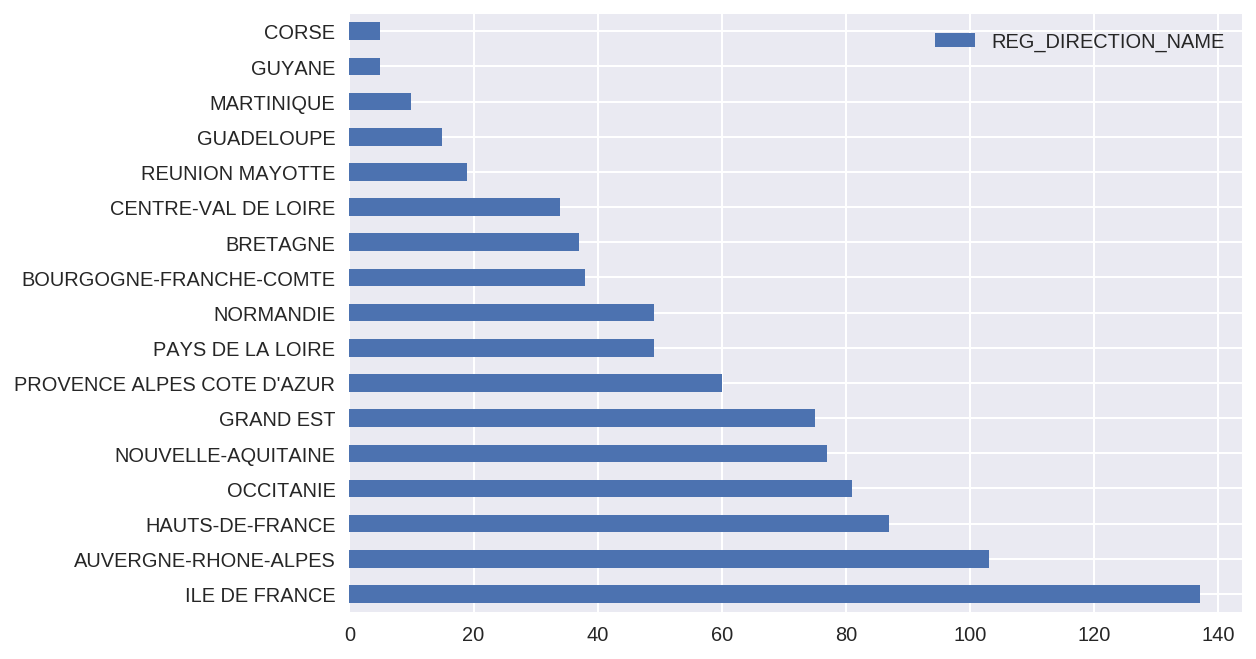

In [22]:
agencies_info.REG_DIRECTION_NAME.value_counts().to_frame().plot(kind='barh')
agencies_info.REG_DIRECTION_NAME.nunique()

13 regions in Metropolitan France, and 4 for overseas (Guyane, Martinique, Guadeloupe and Réunion-Mayotte). It looks like they're all here with a decent number of agencies: densily populated regions have a lot of agencies, others have less.

### Geo Locations

Now let's check the geographic locations. First why are some of them missing?

In [23]:
agencies_info[agencies_info.LONGITUDE.isnull()].head()

,ADDRESS_LINE_3,ADDRESS_LINE_4,ADDRESS_LINE_5,ADDRESS_LINE_6,AGENCY_NAME,AGENCY_TYPE_CODE,AGENCY_TYPE_NAME,APPT_WEEKLY_NUMBER_HOURS,AURORE_AGENCY_CODE,CITY_CODE,...,EMAIL,ESTABLISHMENT_TYPE,ESTABLISHMENT_TYPE_NAME,LATITUDE,LONGITUDE,POSTCODE,PUBLIC_PHONE_NUMBER,REG_DIRECTION_NAME,SAFIR_AGENCY_CODE,WEEKLY_NUMBER_HOURS
203,Immeuble PAPAOL,VOIE Voie-Verte,NaN,97122 BAIE MAHAULT,PETIT-BOURG,APE,AGENCE POLE EMPLOI,5.67,GUA0160,97103,...,NaN,3,Site d'accueil en libre service et sur RDV,NaN,NaN,97122,39-49,GUADELOUPE,97709,26.33
204,Immeuble BNP,RUE Emmanuel Blandin ZAC MOUDONG SUD,NaN,97122 BAIE MAHAULT,JARRY,APE,AGENCE POLE EMPLOI,5.67,GUA0162,97103,...,NaN,3,Site d'accueil en libre service et sur RDV,NaN,NaN,97122,39-49,GUADELOUPE,97710,26.33
456,NaN,4 RUE Amédée Dormoy,CS 11322,76000 ROUEN,Rouen Luciline,APE,AGENCE POLE EMPLOI,15.00,NOR0543,76540,...,ape.76112@pole-emploi.fr,3,Site d'accueil en libre service et sur RDV,NaN,NaN,76000,39-49,NORMANDIE,76112,20.00
815,Niveau 5,10 RUE Brancion,NaN,75015 PARIS,Cadres Paris Brancion,APES,AGENCE POLE EMPLOI SPECIALISEE,15.00,IDF0423,75115,...,ape.75118@pole-emploi.fr,3,Site d'accueil en libre service et sur RDV,NaN,NaN,75015,39-49,ILE DE FRANCE,75118,20.00
816,NaN,4 RUE DES CHAUFFOURS,NaN,95000 CERGY,Cadres Cergy,APES,AGENCE POLE EMPLOI SPECIALISEE,15.00,IDF0426,95127,...,at.95074@pole-emploi.fr,3,Site d'accueil en libre service et sur RDV,NaN,NaN,95000,39-49,ILE DE FRANCE,95074,20.00


Hmm, I see no good reasons why they do not have their geographic coordinates. Google Maps seem to be able to find them, see [the one in Rouen](https://goo.gl/maps/PmyrPkM95Q92), and [the one in Cergy](https://goo.gl/maps/RNkPPqRR4n72). We should probably tell Pôle emploi about those.

In the meantime let's plot the others:

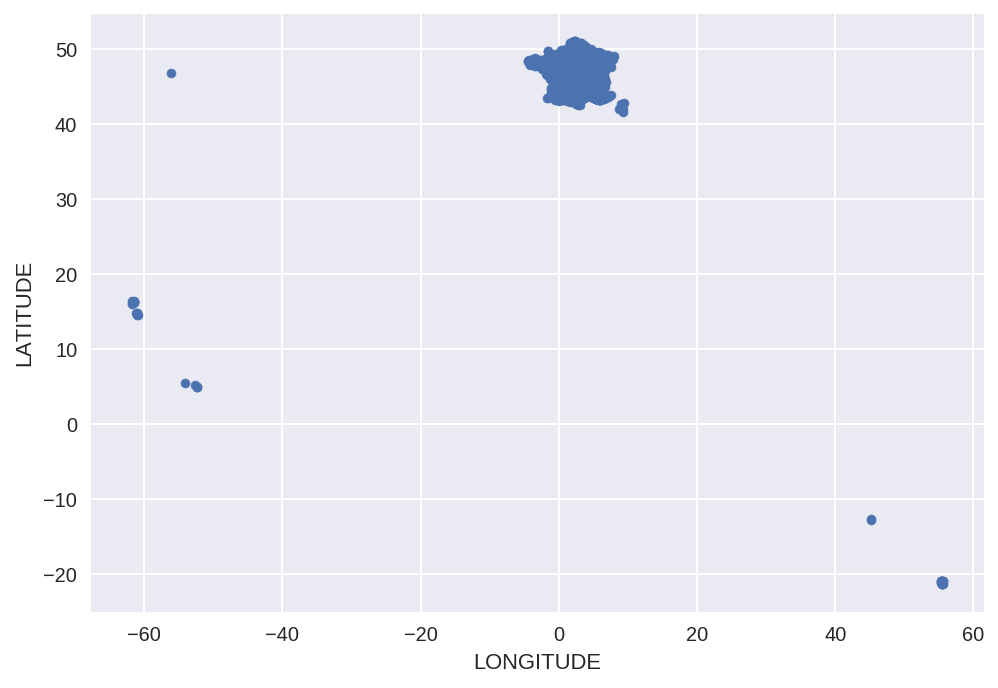

In [24]:
agencies_info.plot(kind='scatter', x='LONGITUDE', y='LATITUDE');

Cool: pretty neat and obvious. We have the location of Pôle emploi agencies including the ones in DOM/TOM. Awesome!
    
Wait a minute, there seems to be an agency next to Saint-Pierre et Miquelon whereas we did not see any corresponding region before. Let's check:

In [25]:
agencies_info[
    (agencies_info.LATITUDE > 40) &
    (agencies_info.LONGITUDE < -40)
][['AGENCY_NAME', 'REG_DIRECTION_NAME']]

,AGENCY_NAME,REG_DIRECTION_NAME
188,SAINT PIERRE ET MIQUELON,NORMANDIE


OK, it is indeed in Saint-Pierre et Miquelon, it's just that it's joined with the `Normandie` region.

Let's zoom in Metropolitan France:

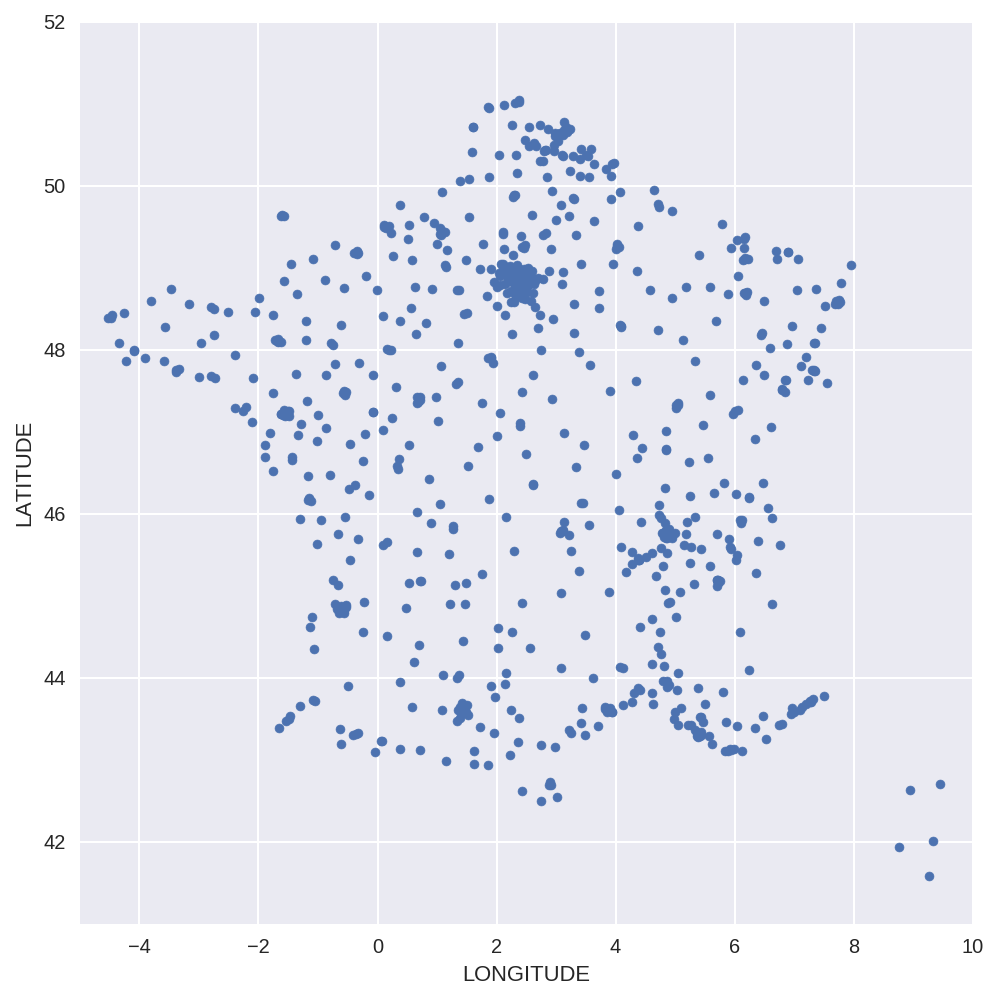

In [26]:
agencies_info[(agencies_info.LONGITUDE < 10) & (agencies_info.LONGITUDE > -5)]\
    .plot(kind='scatter', x='LONGITUDE', y='LATITUDE',
          xlim=(-5, 10), ylim=(41, 52),
          # Fix figsize to have a good aspect ratio: 1.414 ~= 1/cos(45°).
          figsize=(8, 8 * 1.414 * (52 - 41) / (10 - -5)));

That sounds like a good view of major cities in France! Finally, let's check that we have precise addresses and not only the center of cities. For instance let's check the agencies in Paris:

In [27]:
agencies_info[(agencies_info.POSTCODE.astype(str).str.startswith('75'))]\
    [['AGENCY_NAME', 'LONGITUDE', 'LATITUDE']].head()

,AGENCY_NAME,LONGITUDE,LATITUDE
312,Cadres Paris Ney,2.352555,48.898492
440,Paris 20ème Vitruve,2.406318,48.858900
441,Paris 11ème Beaumarchais,2.369914,48.859814
483,Paris 20ème Piat,2.383428,48.872811
484,Cadres Paris Magenta,2.354368,48.874513


Cool! Obviously they don't have all the same coordinates so most probably they would relate to actual addresses and not just cities. Finally let's do a point check for an agency we went to physically (Arles):

In [28]:
agencies_info[agencies_info.AGENCY_NAME == 'ARLES'][['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
758,43.679128,4.636412


Pretty neat! The [coordinates](https://www.google.fr/maps/search/43.679128+4.63641243) are actually less than 50 meters from the agency's entrance. I think we can trust those coordinates.

## Conclusion

The agencies dataset contains detailed information about Pôle emploi agencies:
* The precise business hours, both for self-service and appointments.
* Two kinds of agencies: normal and "specialized" ones.
* The phone number, although in almost all cases it's the global `3949`.
* The actual precise locations for most of them.

It contains agencies across all France including DOM, Mayotte, Saint-Pierre & Miquelon (but not other overseas collectivities like French Polynesy or Wallis & Futuna).

It could probably be interesting to add to an advice recommending to go to a local Pôle emploi agency, especially on the self-serve slots. It would not change much the advice but make it super personalized in the eyes of the users.

Further possible investigations:
* Check with Pôle emploi:
  * What does "specialized" agency means?
  * Why don't we have lat/lng for a few of them?
  * Fix the typo in the email address `@pole-emplopi.fr`.
  * Are there any PE agencies in Tahiti or other overseas collectivities?
* Use a Maps Jupyter extension to show the agencies nicely (I tried with a gmaps widget but wasn't succesful right away).